In [72]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data file using pandas
df=pd.read_csv("googleplaystore.csv")
# Knowing the data
df.head()
# Checking for null Values count in each column
x=df.isnull().sum()
print(x)
# Droping the records with null in any of the column
df.dropna(inplace=True)
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [73]:
# Formatting the data
# converting categorical data types into numeric ones to facilitate analysis
# Extract the numeric value from the column & Multiply the value by 1,000, if size is mentioned in Mb
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device','nan') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x : float(x))
df = df[pd.notnull(df['Size'])]
df['Size'].dtype


dtype('float64')

In [74]:
# Converting Reviews column into float type
df['Reviews']=df['Reviews'].astype("float")
df['Reviews'].dtype

dtype('float64')

In [75]:
# Treat 1,000,000+ as 1,000,000, remove ‘+’, ‘,’ from the field, convert it to integer
df['Installs'] = df['Installs'].apply (lambda x: str(x).replace('+','') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].astype("int")
df['Installs'].dtype

dtype('int64')

In [76]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric
df['Price'] = df['Price'].apply( lambda x: str(x).replace("$","") if "$" in str(x) else x)
df['Price'] = df['Price'].astype("float")
df['Price'].dtype

dtype('float64')

In [77]:
# Average rating should be between 1 and 5 , Drop the rows that have a value outside this range.
df[df['Rating']>5].shape[0]

0

In [78]:
# Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them
df[df['Reviews']>df['Installs']].shape[0]

6

In [79]:
df.drop(df[df['Reviews']>df['Installs']].index, inplace=True)

In [80]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows
df[(df['Type']=="free") & (df['Price']>0)].shape[0]

0

<AxesSubplot: xlabel='Price'>

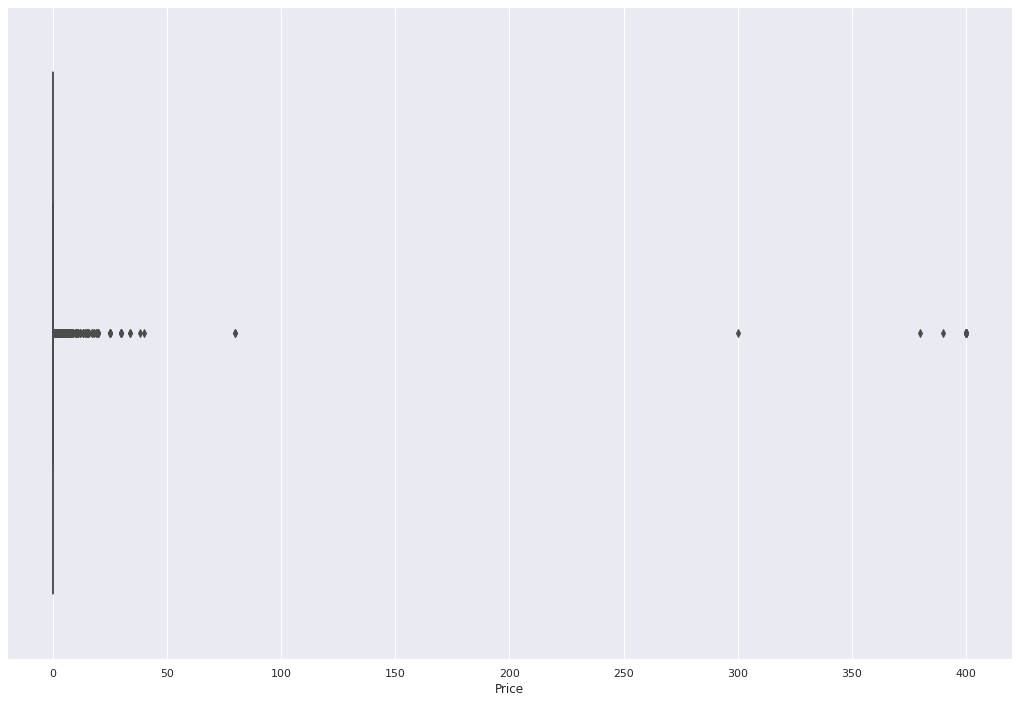

In [81]:
# Univariate analysis
# Boxplots for price
sns.boxplot(data=df, x='Price')

<AxesSubplot: xlabel='Reviews'>

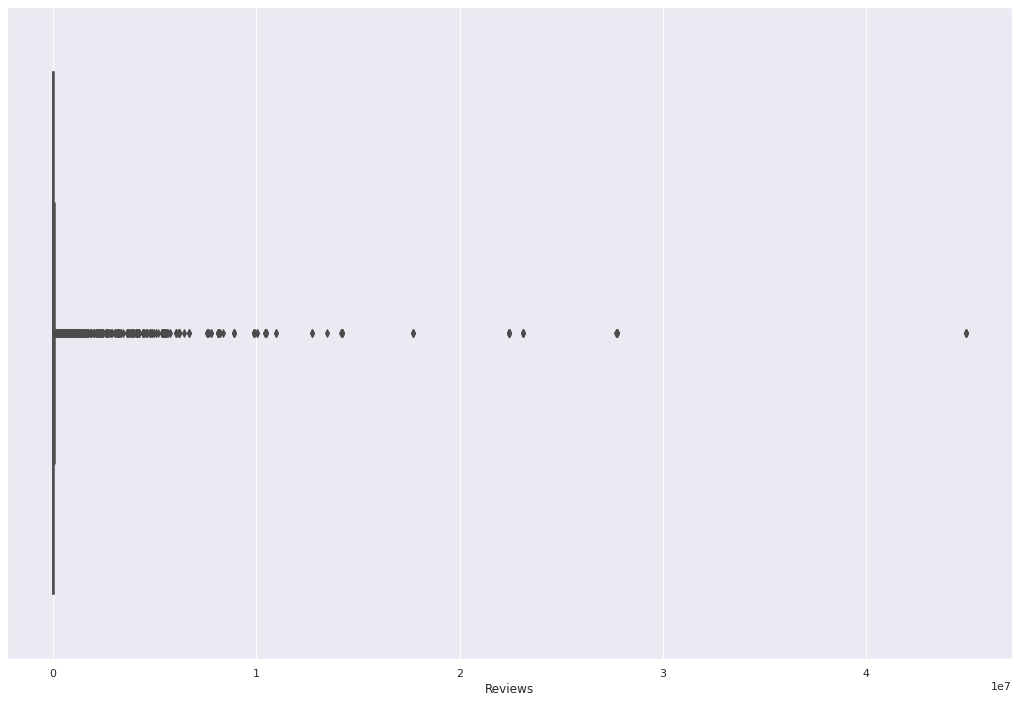

In [82]:
# Univariate analysis
# Boxplots for Reviews
sns.boxplot(data=df, x='Reviews')

In [83]:
# There are some outliers in the Price column
# There are some apps whose price is more than usual apps on the Googleplaystore
# Indeed there are some apps that have very high number of Review

<AxesSubplot: xlabel='Rating', ylabel='Count'>

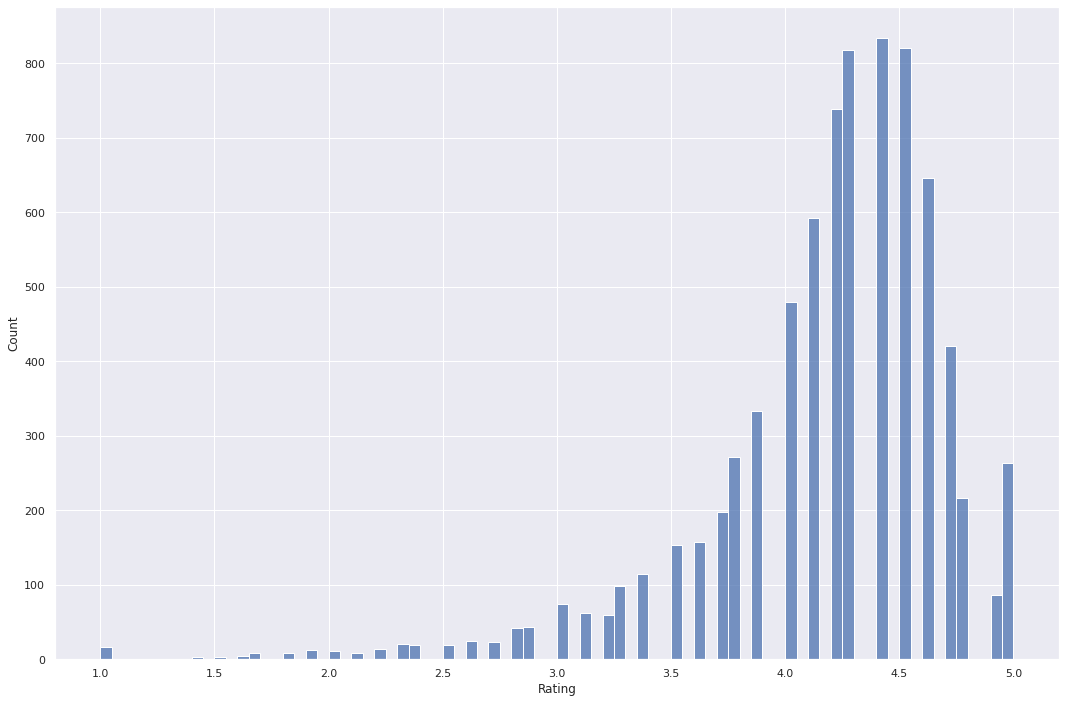

In [84]:
# Univariate analysis
# Histplots for Rating
sns.histplot(data=df,x='Rating')

In [85]:
# There is a Negative skewness(left- skewed) some apps seem to have higher Ratings than usual

<AxesSubplot: xlabel='Size', ylabel='Count'>

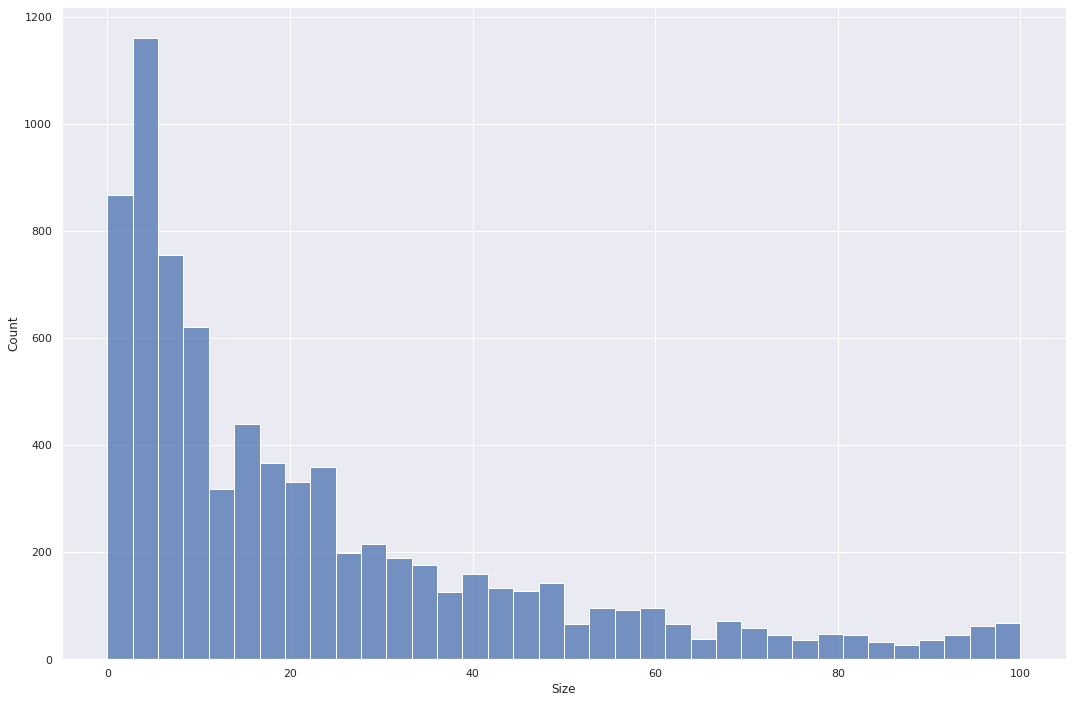

In [86]:
# Univariate analysis
# Histplot for Size
sns.histplot(data=df,x='Size')

In [87]:
# positive skewness Right Skewed
# As per the above observation of plots, there seems to be some outliers in the Price & Reviews column, In the Installs column as well

In [88]:
# Check out the records with very high price
df[df['Price']>200].shape[0]

15

In [89]:
# Drop these as most seem to be junk apps
df.drop(df[df['Price']>200].index, inplace=True)

In [90]:
df.drop(df[df['Reviews']>2000000].index, inplace= True)
df.shape

(7483, 13)

In [91]:
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)

/tmp/ipykernel_341/3150743028.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)


,Rating,Reviews,Size,Installs,Price
0.10,3.5,13.00,2.5,1000.0,0.00
0.25,4.0,99.00,5.1,10000.0,0.00
0.50,4.3,2026.00,14.0,100000.0,0.00
0.70,4.5,20295.60,26.0,1000000.0,0.00
0.90,4.7,180385.40,56.0,10000000.0,0.00
0.95,4.8,407660.30,72.9,10000000.0,1.99
0.99,5.0,1242884.16,96.0,50000000.0,8.99


In [92]:
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
df.drop(df[df['Installs']>10000000].index, inplace= True)

In [93]:
# Make scatter plots (for numeric features) and box plots (for character features) 
# to assess the relations between rating and the other features

<AxesSubplot: xlabel='Rating', ylabel='Price'>

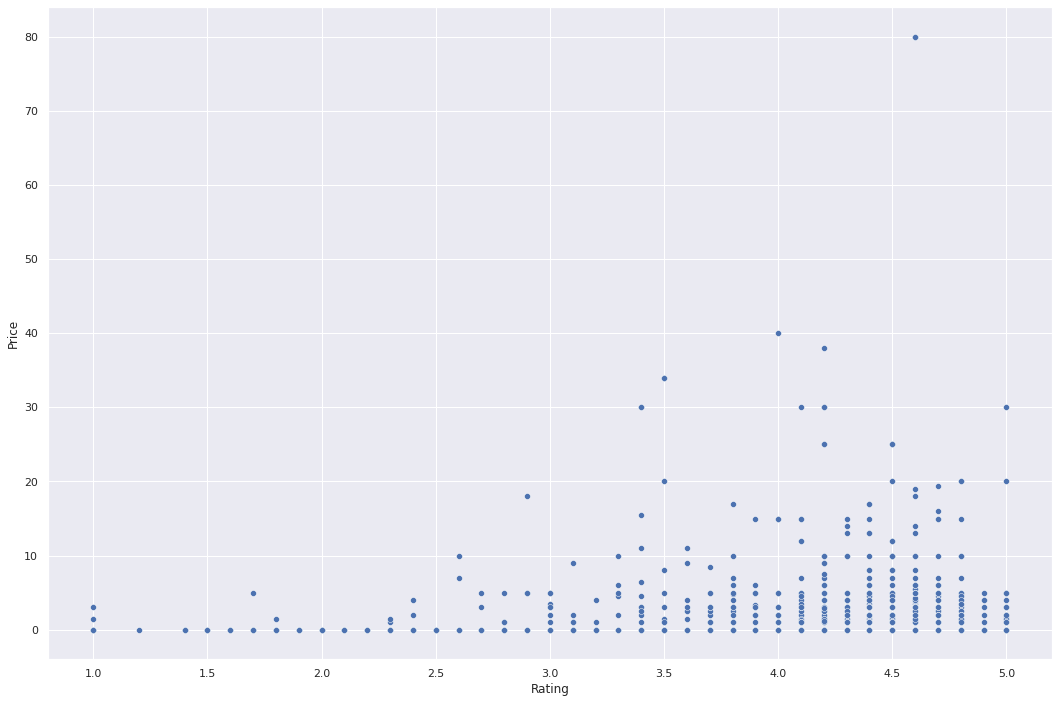

In [94]:
sns.scatterplot(data=df, x='Rating',y='Price')

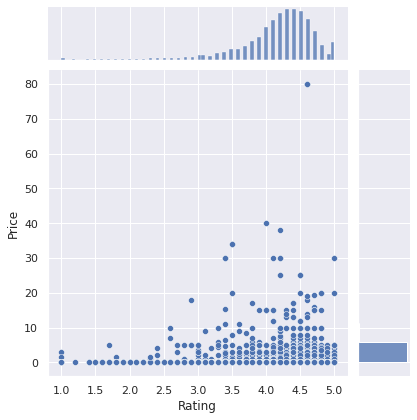

In [95]:
sns.jointplot(x= 'Rating',y= 'Price',data= df)

In [96]:
# Both the plots show a positive linear relationship; as the price of an app increases its rating also increases. 
# That states the paid apps have the highest of Ratings

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

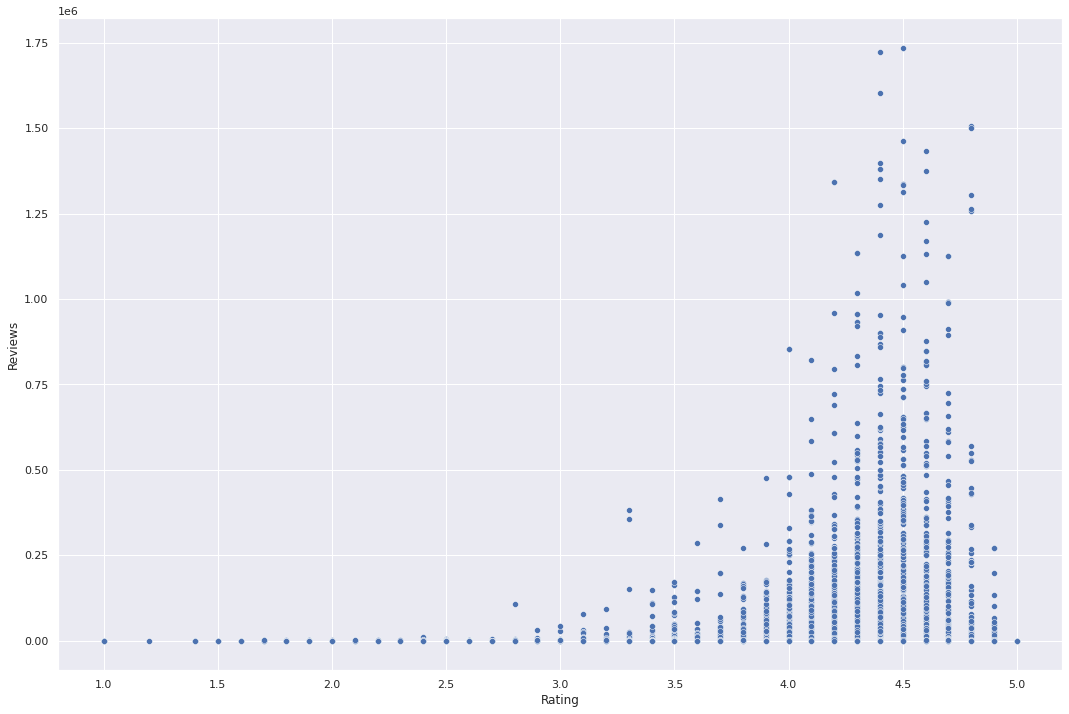

In [113]:
sns.scatterplot(x= 'Rating',y= 'Reviews', data= df)

In [ ]:
# The plot shows a positive linear relationship between Ratings and Reviews. More reviews mean better ratings indeed

<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

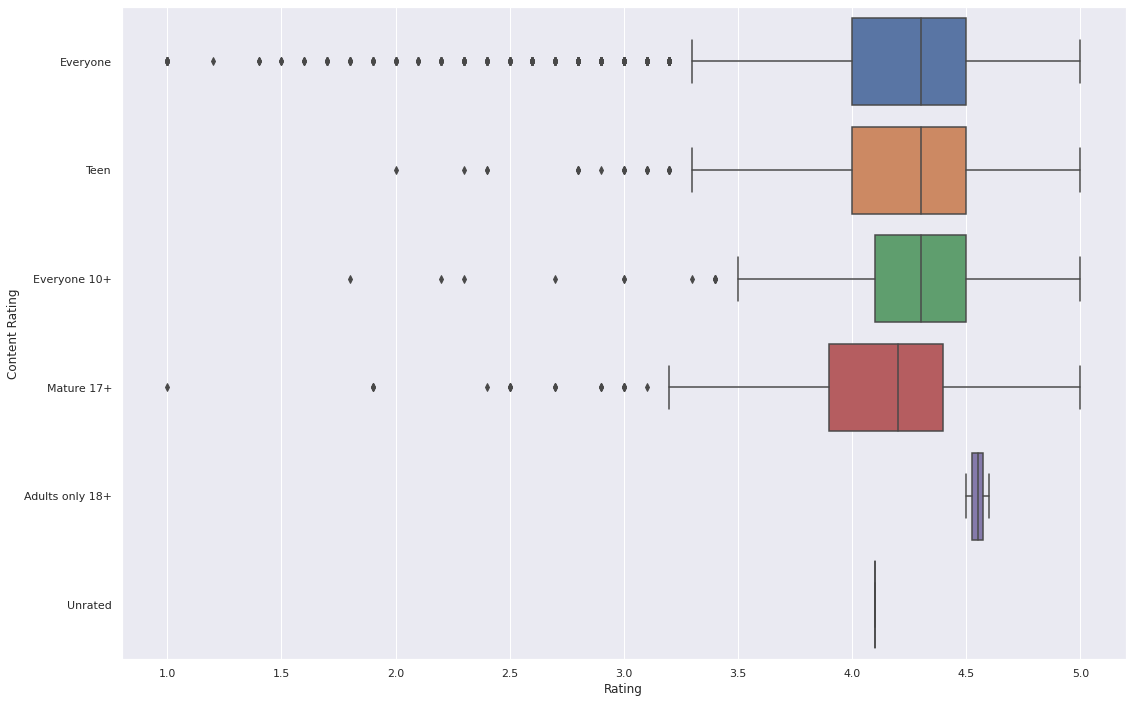

In [97]:
sns.boxplot(data=df, x='Rating',y='Content Rating')

In [98]:
# The above plot shows the apps for Everyone is worst rated as it contain the highest number of outliers followed by apps for Mature 17+ and Everyone 10+ along with Teen. 
# The catergory Adults only 18+ is rated better and falls under most liked type

<AxesSubplot: xlabel='Rating', ylabel='Category'>

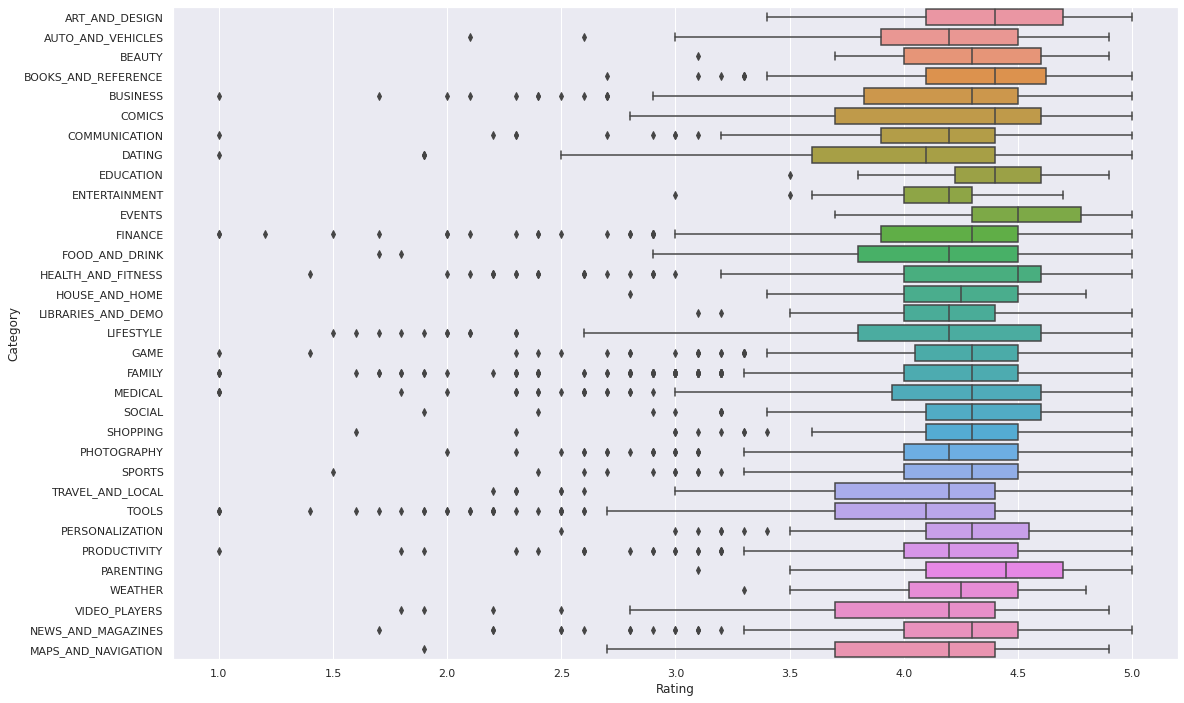

In [99]:
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(data=df, x='Rating',y='Category')

In [100]:
# creating a copy of the data(df) to make all edits
inp1=df.copy()
inp1.head()

# Reviews and Installs column still have some relatively high values
# before building the linear regression model we need to reduce the skew; columns needs log transformation
inp1.skew()

/tmp/ipykernel_341/2343976428.py:7: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inp1.skew()


Rating      -1.692510
Reviews      5.305328
Size         1.533259
Installs     1.922597
Price       15.724184
dtype: float64

In [101]:
# apply log transformation to Reviews
reviews_skew = np.log1p(inp1['Reviews'])
inp1['Reviews']= reviews_skew
reviews_skew.skew()

-0.06808430177422468

In [102]:
# apply log transformation to Installs
Installs_skew = np.log1p(inp1['Installs'])
inp1['Installs']
Installs_skew.skew()

-0.3930918801065247

In [103]:
# Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'], axis= 1, inplace = True)

In [104]:
# create a copy of dataframe
inp2=inp1

# As Model does not understand any Catergorical variable hence these need to be converted to numerical
# Dummy Encoding is one way to convert these columns into numerical
x = inp2[['Category']]
del inp2['Category']
dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19.0,10000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,5000000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,100000,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,50000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# There are too many categories under Genres.
# we will reduce some categories which have very few samples under them and put them under one new common category i.e. "Other"
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
        
#Storing the genres column into x varible and delete the genres col from dataframe inp2
#And concat the encoded cols to the dataframe inp2

inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [106]:
#Applying one hot encoding 
#Storing the Content Rating column into x varible and delete the Content Rating col from dataframe inp2
#And concat the encoded cols to the dataframe inp2

x = inp2[['Content Rating']]
del inp2['Content Rating']
dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8.7,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2.8,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5.6,50000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [107]:
#importing the neccessary libraries from sklearn to split the data and and for model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [108]:
#Creating the variable X and Y which contains the X features as independent features and Y is the target feature 

df2 = inp2
X = df2.drop('Rating',axis=1)
y = df2['Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=5)

In [109]:
#Create a linear reggression obj by calling the linear reggressor algorithm

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [110]:
# r2 value for training set

R2_train = round(lm.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.068


In [111]:
# r2 value for testing set

R2_test = round(lm.score(X_test,y_test),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.058


In [112]:
# predict test

y_hat = lm.predict(X_test)
R2_test_data =metrics.r2_score(y_test,y_hat)
R2_test_data

0.057753700325213764